### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np

m = np.arange(12).reshape((3,4))

print('matrice: \n',m, '\n')
print('media di tutti gli elementi: ', np.mean(m),' check: ',(0+1+2+3+4+5+6+7+8+9+10+11)/12)

for i in range(m.shape[0]):
    print('media della riga ',i,'= ', np.mean(m[i]))
    
for c in range(m.shape[1]):
    print('media della colonna', c, '= ', np.mean(m[:,c]))
    
print('medie lungo le righe: ', list(m.mean(axis=1)))
print('medie lungo le colonne: ', list(m.mean(axis=0)))


matrice: 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

media di tutti gli elementi:  5.5  check:  5.5
media della riga  0 =  1.5
media della riga  1 =  5.5
media della riga  2 =  9.5
media della colonna 0 =  4.0
media della colonna 1 =  5.0
media della colonna 2 =  6.0
media della colonna 3 =  7.0
medie lungo le righe:  [1.5, 5.5, 9.5]
medie lungo le colonne:  [4.0, 5.0, 6.0, 7.0]


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

#1
print('Metodo 1:')
print(np.outer(u,v))
print('\n')

#2
print('Metodo 2:')
print(np.array([u[i]*v[j] for i in range(4) for j in range(4)]).reshape(4,4))
print('\n')
#3
print('Metodo 3:')
ut=u.reshape(4,1)
u3=np.tile(ut,(1,4))
print(v*u3)

Metodo 1:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


Metodo 2:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


Metodo 3:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [3]:
a=np.random.random(60).reshape(10,6)

print('array originale: ')
print(a,'\n')

print('primo modo: ')
mask=(a<0.1)
a[mask]=0
print(a)

a=np.random.random(60).reshape(10,6)
print(a.shape[0])


print('secondo modo: ')
#for i in range(a.shape[1]):
#    mask=np.any(a<0.1,axis=i)
#    print(mask)

array originale: 
[[0.21461447 0.23470633 0.577701   0.13522871 0.39462253 0.91424378]
 [0.42853828 0.79681126 0.77355146 0.05157549 0.56847087 0.97754986]
 [0.24042179 0.40396407 0.65107879 0.62165589 0.98016548 0.87115114]
 [0.32524752 0.91230221 0.01373478 0.54172581 0.46645326 0.98774226]
 [0.85689069 0.04988661 0.36927507 0.61027396 0.70093841 0.32823268]
 [0.38635542 0.28367798 0.2371838  0.11322059 0.69902818 0.34947748]
 [0.67886041 0.43303349 0.59106291 0.52664745 0.35702974 0.03377333]
 [0.09041584 0.81182657 0.63975155 0.70661179 0.25373296 0.82744052]
 [0.31668171 0.80294711 0.33171117 0.26399143 0.36950696 0.62437548]
 [0.72014206 0.17282378 0.32144664 0.27203251 0.02681907 0.92509663]] 

primo modo: 
[[0.21461447 0.23470633 0.577701   0.13522871 0.39462253 0.91424378]
 [0.42853828 0.79681126 0.77355146 0.         0.56847087 0.97754986]
 [0.24042179 0.40396407 0.65107879 0.62165589 0.98016548 0.87115114]
 [0.32524752 0.91230221 0.         0.54172581 0.46645326 0.98774226]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

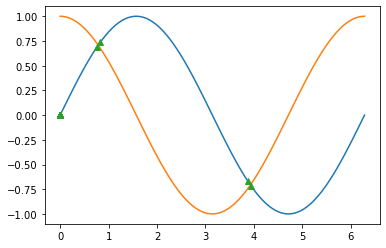

In [4]:
import math
import matplotlib.pyplot as plt

b=np.linspace(0,2*math.pi,100)
print(b)
b1=b[::10]
print('\n',b1)
b2=b[::-1]
print('\n',b2)


mask=(abs(np.sin(b)-np.cos(b)))<0.1
b3=b.copy()
b3[mask]=0
print(b3)

plt.plot(b,np.sin(b),b,np.cos(b),b-b3,np.sin(b-b3),'^')

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [5]:
c1=np.arange(1,11)
c2=np.arange(1,11)
#costruisco la matrice
c=np.outer(c1,c2)
print('matrice originale:\n',c,'\n')
#trovo la matrice con i soli termini diagonali
cc=np.tril(np.triu(c,0),0)
#calcolo la traccia
print('trace: ' , np.sum(cc))

cr=c[::,::-1]
crc=np.tril(np.triu(cr,0),0)
print('antidiagonal: ', cr.diagonal())

print('diagonal with offset: ', c.diagonal(1))

matrice originale:
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]] 

trace:  385
antidiagonal:  [10 18 24 28 30 30 28 24 18 10]
diagonal with offset:  [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [6]:
dis=np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
dist=np.reshape(dis,(len(dis),1))
mdist=np.tile(dist,(1,len(dis)))

tab=abs(dis-mdist)
print(tab)

print(tab*1.0934)

[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]
[[   0.      216.4932  331.3002  804.7424  952.3514 1284.745  1612.765
  1688.2096 2091.6742 2676.6432]
 [ 216.4932    0.      114.807   588.2492  735.8582 1068.2518 1396.2718
  1471.7164 1875.181  2460.15  ]
 [ 331.3002  114.807     0.      473.4422  621.0512  953.4448 1281.4648
  1356.9094 1760.374  2345.343 ]
 [ 804.7424  588.2492  473.4422    0.      147.609   480.0026  808.0226
   883.4672 1286.9318 1871.9008]
 [ 952.3514  735.8582  621.0512  147.609     0.   

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [7]:
a=np.arange(1,100)

def prime(x):
    if x==1: return True
    for i in range(1,x):
        t=x-i
        if t==1:
            return True
        elif x%t==0:
            return False

            
foo = np.vectorize(prime)
mask=(foo(a))
f_a=a[mask]

print('Funzione: ',f_a)
%timeit a[foo(a)]
loop=a.copy()
def maschera(loopa):
    for n in range(2,int(pow(len(loopa),1/2))):
        mask_n=(np.logical_or(loopa%n!=0,loopa==n))
        loopa=loopa[mask_n]
    return loopa
    
print('Mask: ',maschera(loop))
%timeit maschera(loop)
def eratostene(ea):
    i=1
    while ea[i]<pow(len(a),1/2):
        masker=(np.logical_or(ea%ea[i]!=0,ea==ea[i]))
        ea=ea[masker]
        i+=1
    return(ea)

print('Eratostene: ',eratostene(a))    
%timeit eratostene(a)

Funzione:  [ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83
 89 97]
382 µs ± 13.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Mask:  [ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83
 89 97]
41.4 µs ± 4.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Eratostene:  [ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83
 89 97]
42.9 µs ± 504 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

[[ 1  1 -1 ... -1  1  1]
 [-1 -1  1 ...  1  1  1]
 [-1  1  1 ...  1 -1  1]
 ...
 [ 1  1 -1 ... -1  1  1]
 [ 1  1  1 ...  1 -1 -1]
 [-1 -1 -1 ... -1  1 -1]]
[  1.      1.984   2.88    3.92    4.912   6.208   7.448   8.364   9.288
  10.472  11.744  12.804  13.384  14.556  16.064  17.14   18.648  19.68
  20.824  21.74   23.008  24.096  24.904  25.852  26.864  27.784  28.88
  30.26   31.392  32.26   32.912  33.928  35.76   37.08   37.704  37.928
  39.424  40.888  42.256  43.208  44.456  45.364  45.664  46.456  47.648
  47.648  48.312  49.876  50.56   51.504  52.936  53.992  55.048  55.392
  56.152  57.74   59.104  59.652  60.152  61.748  63.16   63.544  63.904
  65.576  66.04   66.992  68.296  69.376  70.08   72.12   73.512  74.376
  75.48   76.268  78.424  79.76   80.424  81.068  83.904  85.144  86.336
  86.356  87.712  88.024  88.984  91.316  91.48   92.46   94.056  95.228
  96.24   97.38  100.84  101.144 102.52  102.536 104.256 105.344 106.4
 107.644 108.264 109.656 110.912 111.34  111.

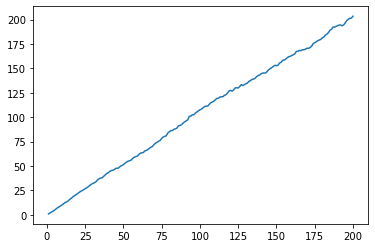

In [8]:

a=np.random.randint(0,2,200*1000).reshape(1000,200)
a[a==0]=-1
print(a)

#print(dist)



bist=a.copy()
sumpa=0
for i in range(bist.shape[0]):
    for f in range(bist.shape[1]):
        for n in range(f+1):
            sumpa+=(a[i][n])
            bist[i][f]=sumpa
        sumpa=0


dist=bist**2


#MEAN

m=np.array([np.mean(dist[:,i]) for i in range(a.shape[1])])
print(m)

time=np.arange(1,201)

plt.plot(time,m)

#NO, I THOUGHT THE DISTANCE WOULD DECREASE AND BECOME CLOSER TO ZERO WITH THE GROWTH OF TIME

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

[[ 1900.  1901.  1902.  1903.  1904.  1905.  1906.  1907.  1908.  1909.
   1910.  1911.  1912.  1913.  1914.  1915.  1916.  1917.  1918.  1919.
   1920.]
 [30000. 47200. 70200. 77400. 36300. 20600. 18100. 21400. 22000. 25400.
  27100. 40300. 57000. 76600. 52300. 19500. 11200.  7600. 14600. 16200.
  24700.]
 [ 4000.  6100.  9800. 35200. 59400. 41700. 19000. 13000.  8300.  9100.
   7400.  8000. 12300. 19500. 45700. 51100. 29700. 15800.  9700. 10100.
   8600.]
 [48300. 48200. 41500. 38200. 40600. 39800. 38600. 42300. 44500. 42100.
  46000. 46800. 43800. 40900. 39400. 39000. 36700. 41800. 43300. 41300.
  47300.]]


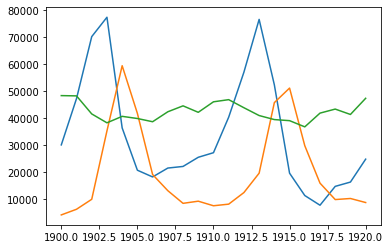

In [9]:
a=np.loadtxt('populations.txt')
a=a.flatten()
b=np.array([a[0::4],a[1::4],a[2::4],a[3::4]])
print(b)


plt.plot(b[0],b[1],b[0],b[2],b[0],b[3])